In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm

#Load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

#Scale the variables and load into 'X'
from sklearn.preprocessing import scale
X = scale(iris.data)

#Assign target values to 'y'
y = pd.DataFrame(iris.target)

#Create an object for our variable names
variable_names = iris.feature_names

#Print first 10 records
print(X[0:10,])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [2]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=5)

#Use fit method to create a model
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

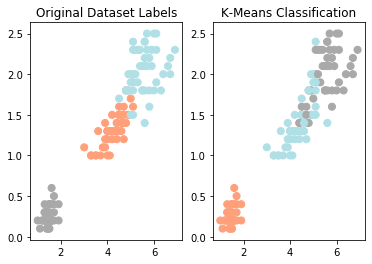

In [3]:
#Create dataframe for original data comparison with model prediction
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

#Set a variable color_theme to color our data points by their species label. 
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

#Set the color_theme as per original dataset labels 'iris.target'.
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Original Dataset Labels')

#Change the color_theme as per the labels that were predicted by our clustering model.
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')
plt.show()